In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\saira\AppData\Local\Temp\ipykernel_20360\944635163.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  vix = pd.read_csv("../data/vix_data.csv", index_col=0, parse_dates=True)
C:\Users\saira\AppData\Local\Temp\ipykernel_20360\944635163.py:24: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  sns.heatmap(numeric_combined.pct_change().corr(), annot=True, cmap="coolwarm")


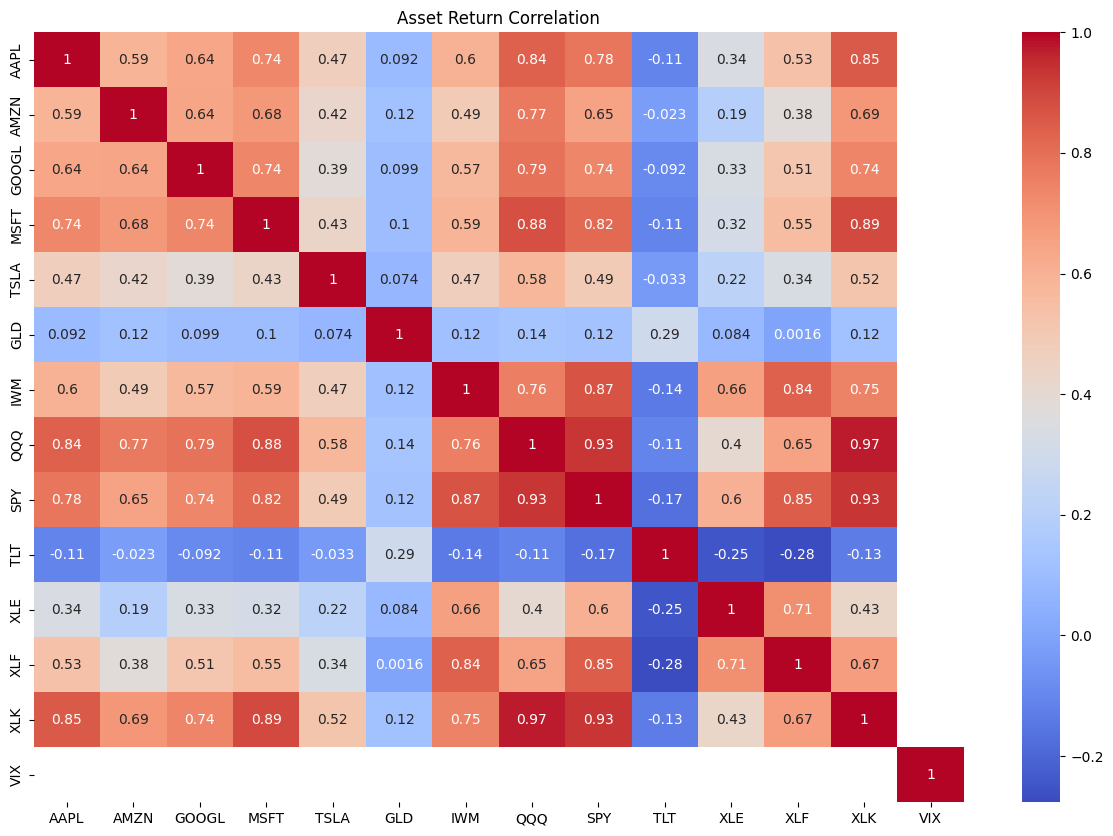

In [10]:
stocks = pd.read_csv("../data/stock_prices.csv", index_col=0, parse_dates=True)
etfs = pd.read_csv("../data/etf_data.csv", index_col=0, parse_dates=True)
vix = pd.read_csv("../data/vix_data.csv", index_col=0, parse_dates=True)

# Use VIX column directly
if 'VIX' in vix.columns:
    vix_series = vix['VIX']
else:
    raise ValueError(f"Expected 'VIX' column in VIX data. Found: {vix.columns.tolist()}")

# Combine all data
combined = stocks.join(etfs, how="outer").join(vix_series, how="outer")

# Save combined data
combined.to_csv("../data/full_market_data.csv")

# Keep only numeric columns (drop strings, objects, etc.)
numeric_combined = combined.apply(pd.to_numeric, errors='coerce')

# Drop columns that are completely non-numeric
numeric_combined = numeric_combined.dropna(axis=1, how='all')
plt.figure(figsize=(15, 10))
# Correlation matrix of returns
sns.heatmap(numeric_combined.pct_change().corr(), annot=True, cmap="coolwarm")
plt.title("Asset Return Correlation")
plt.show()